In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

In [ ]:
data = pd.read_csv('Petrol.csv')
data.head()

,Year,Month,Petrol Price (PKR)
0,2024,December,252.10
1,2024,November,248.38
2,2024,November,248.38
3,2024,October,247.03
4,2024,October,247.03


In [ ]:
def month_to_number(value):
    if value == "January":
        return 1
    elif value == "February":
        return 2
    elif value == "March":
        return 3
    elif value == "April":
        return 4
    elif value == "May":
        return 5
    elif value == "June":
        return 6
    elif value == "July":
        return 7
    elif value == "August":
        return 8
    elif value == "September":
        return 9
    elif value == "October":
        return 10
    elif value == "November":
        return 11
    elif value == "December":
        return 12
    else:
        return None  # Handle cases where the month name is not recognized

data['Month'] = data['Month'].apply(month_to_number)
data.to_csv('modified_petrol.csv', index=False)

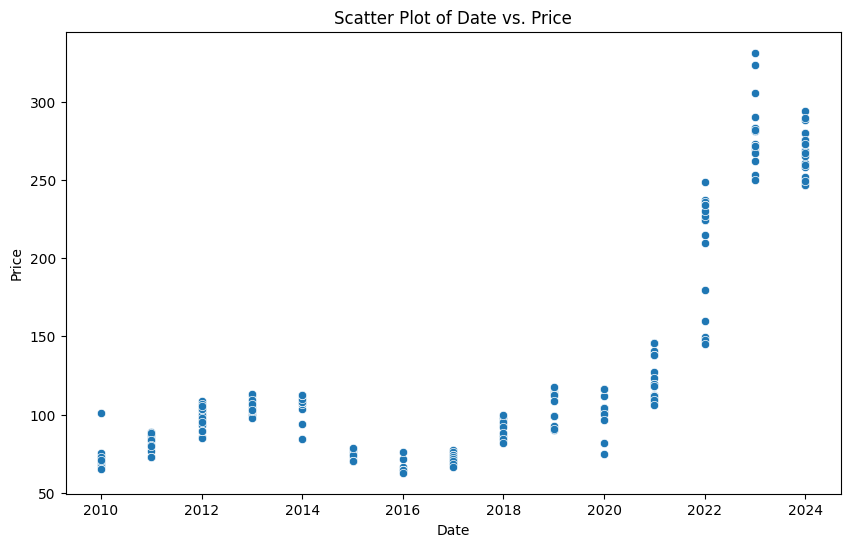

In [ ]:
# prompt: scatter visualize the date and the price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Petrol Price (PKR)', data=data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Scatter Plot of Date vs. Price')
plt.show()

In [ ]:
X = data[["Year","Month"]]
y = data[["Petrol Price (PKR)"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2808.4352483531497
R-squared: 0.5753216358827512


In [ ]:
predi = [[2028,4]]
predi_df = pd.DataFrame(predi, columns=["Year", "Month"])  # Use the original column names
predi_scaled = scaler.transform(predi_df)
prediction = model.predict(predi_scaled)
print("Price straight:", prediction)

predi = [[2024,9]]
predi_df = pd.DataFrame(predi, columns=["Year", "Month"])  # Use the original column names
predi_scaled = scaler.transform(predi_df)
prediction = model.predict(predi_scaled)
print("Price straight:", prediction)

Price straight: [[250.042842]]
Price straight: [[209.33581208]]


In [ ]:
import joblib

# Load the saved model
loaded_model = joblib.load('model.pkl')
loaded_scaler = joblib.load('scaler.pkl')


new_data = [[2024,9]]

new_data = loaded_scaler.transform(new_data)
# Predict cluster labels for new data
predictions = loaded_model.predict(new_data)
print("Price from the model:", predictions)

Price from the model: [[209.33581208]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
